In [55]:
# homework_set_8.ipynb

## EE 351M Homework Set 8
# Eric Graves
# edg732
# Created 11/10/2019

In [12]:
import numpy as np
from matplotlib import pyplot as plt
import scipy
import scipy.io
import os
import scipy.signal # Cant find 'signal' when just scipy

%matplotlib inline

# Hide warnings
import warnings
warnings.filterwarnings('ignore')

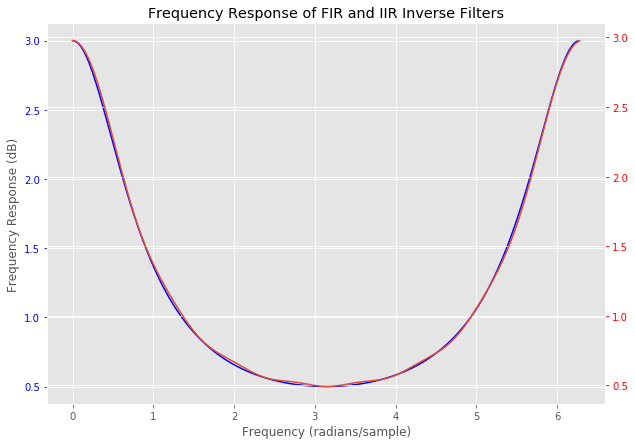

In [24]:
## Problem 2 b)

# Given
n = 256                  # points
M = 8                    # window length
n_d = np.array(range(8)) # discrete time signal after windowing

g_n = 3*(np.power(0.5, n_d)) - 2*(np.power((1/3), n_d)) # from part a)

# pad g values to be 256 points long (actually 248 because window is of size 8)
g_n = np.hstack((g_n, np.zeros([n-M,])))

# FFT to Frequency domain
r_k = np.fft.fft(g_n, 256)
k = np.linspace(0, 2*np.pi, n) # k 'space' for plotting 

# Impulse response
w, g = scipy.signal.freqz(b=[1.00], a=[1.00, (-5.0/6), (1.0/6)], whole=True, worN=256)

# Plot with freqz
with plt.style.context('ggplot'): # Set style to be like R
    
    fig, ax1 = plt.subplots(figsize=(10,7)) 

    ax1.plot(w,np.abs(g),'b') # amplitude
    
    ax1.set_ylabel('Frequency Response (dB)') 
    ax1.set_xlabel('Frequency (radians/sample)') 
    ax1.tick_params('y', colors='b')
    ax1.set_title('Frequency Response of FIR and IIR Inverse Filters')

    ax2 = ax1.twinx()
    ax2.plot(k,abs(r_k))
    ax2.tick_params('y', colors='r') 
    
    
    # Style stuff below
    font = {'family': 'sans',
           'color':  'black',
           'weight': 'normal',
           'size': 16,
           }
    
# Notes: fit is very good with M=8

264


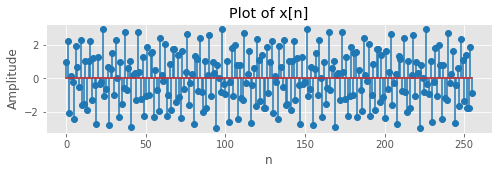

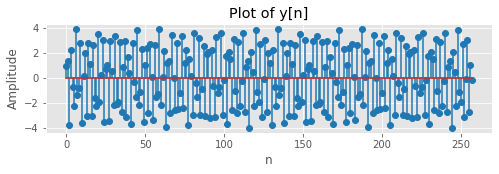

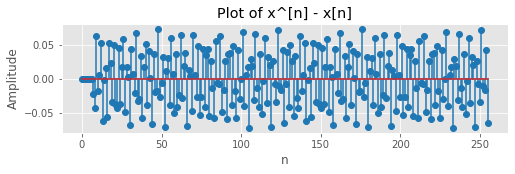

In [29]:
## Problem 2 c)

# Given
n = np.array(range(256))                 # 256 points
h_n= np.array([1.00, (-5.0/6), (1.0/6)]) 

x_n = np.cos(17*np.pi*n/64) + 2*np.sin(23*np.pi*n/32)

y_n = np.convolve(x_n, h_n)

x_hat = np.convolve(g_n[:7], y_n) # de-pad from a). Ends up with len = 264

x_dif = x_hat[:256] - x_n # trim x^[n] to 256

# Plot x[n], y[n], x^[n] - x[n]
with plt.style.context('ggplot'): # Set style to be like R
    
    plt.figure(figsize=(8,2))
    plt.title('Plot of x[n]')
    p1 = plt.stem(x_n)
    plt.ylabel('Amplitude') 
    plt.xlabel('n') 
    
    plt.figure(figsize=(8,2))
    plt.title('Plot of y[n]')
    p2 = plt.stem(y_n)
    plt.ylabel('Amplitude') 
    plt.xlabel('n') 
    
    plt.figure(figsize=(8,2))
    plt.title('Plot of x^[n] - x[n]')
    p3 = plt.stem(x_dif)
    plt.ylabel('Amplitude') 
    plt.xlabel('n') 
    
    # Style stuff below
    font = {'family': 'sans',
           'color':  'black',
           'weight': 'normal',
           'size': 16,
           }